# Week 1: Projectile Motion using Euler's Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Euler Method

In [2]:
# ---------- Simple projectile motion using Euler's method ---------- #

def proj_euler(speed_m, angle, tau, dimTau=False):

    ''' This code takes dimensional tau values and
    non dimensionalises them using Ts. 
    dimTau = True means the value provided is dimensional while
    dimTau = False means the value provided is non-dimensional '''

    # Dimensionalisation parameters
    G = 9.8  # Acceleration due to gravity (m/s^2)
    Ls = 1  # Choice for scaling length (m)
    Ts = np.sqrt(Ls / G)  # Scale for time (s)

    if dimTau == True:
        tau = tau/Ts # makes tau non dimensional!

    # Convert angle to radians
    angle = np.radians(angle)

    # Non-dimensionalise initial speed
    speed = speed_m / (Ls / Ts)

    # Row vectors for non-dimensional position and velocity
    pos = np.array([0, 0])
    vel = speed * np.array([np.cos(angle), np.sin(angle)])

    # Store Initial Condition (for plotting):
    x, y = [pos[0]], [pos[1]]

    # ---- Euler's method ---- #
    
    while pos[1] >= 0:
        
        # Compute one step of Euler's method:
        # First update position using current velocity
        pos = pos + tau * vel
        # Then update velocity with gravity
        vel = vel + tau * np.array([0, -1])

        # Store position for plotting
        x.append(pos[0])
        y.append(pos[1])

    # ---- Estimate Range ---- #

    # Linear interpolation to estimate the range of the projectile
    coOrdsOver = np.array([x[-2], y[-2]])  # Last point projectile above axis
    coOrdsUnder = np.array([x[-1], y[-1]])  # Projectile under ground
    range = coOrdsUnder[0] - coOrdsUnder[1] * (coOrdsUnder[0] - coOrdsOver[0]) / (coOrdsUnder[1] - coOrdsOver[1])
    range_m = Ls * range  # Convert back to m

    # Analytic expression for range
    an_range_m = (speed_m**2 * np.sin(2 * angle)) / G

    return x, y, range_m, an_range_m


In [132]:
def v(t, speed= 100, angle = 45):
    angle = np.radians(angle)
    if t == 0:
        return speed * np.sin(angle), speed*np.cos(angle)
    
    G = 9.8
    
    vy = speed * np.sin(angle) - G * t
    vx = speed * np.cos(angle)

    return (vx, vy)
    


In [135]:
def midpoint_method(f, y0 , t0 , h):
    t = t0
    y = y0
    ts = [t]
    ys = [y]
    while y >= 0:
        k1 = f(t)
        k1 = np.array(k1)[1]
        k2 = f(t + h/2)
        k2 = np.array(k2)[1]
        y = y + h * k2
        t += h
        ts.append(t)
        ys.append(y)

    return ts , ys

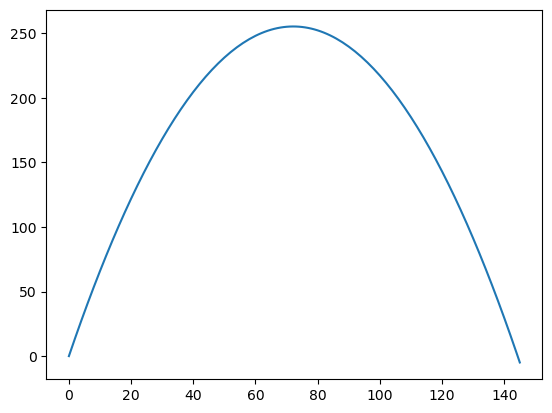

In [ ]:
ts, ys = midpoint_method(v, 0, 0, 0.1)


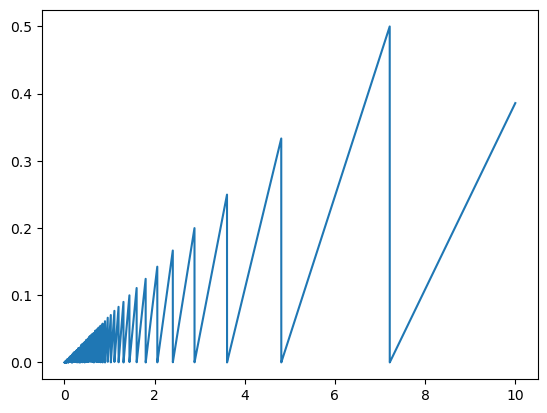

In [145]:
tau = np.linspace(0.001, 10, 10000)
perc = []

for t in tau:
    G = 9.8
    speed = 100
    angle = np.pi/4
    t, y= midpoint_method(v, 0, 0, t)
    range_m = t[-1] * speed * np.cos(angle)
    an_range_m = (speed**2 * np.sin(2 * angle)) / G
    p = (range_m - an_range_m)/an_range_m
    perc.append(np.abs(p))

plt.plot(tau, perc)

In [129]:
# ---------- Simple projectile motion using Euler's method ---------- #

def proj_midpoint(speed_m, angle, tau, dimTau=False):

    ''' This code takes dimensional tau values and
    non dimensionalises them using Ts. 
    dimTau = True means the value provided is dimensional while
    dimTau = False means the value provided is non-dimensional '''

    # Dimensionalisation parameters
    G = 9.8  # Acceleration due to gravity (m/s^2)
    Ls = 1  # Choice for scaling length (m)
    Ts = np.sqrt(Ls / G)  # Scale for time (s)

    if dimTau == True:
        tau = tau/Ts # makes tau non dimensional!

    # Convert angle to radians
    angle = np.radians(angle)

    # Non-dimensionalise initial speed
    speed = speed_m / (Ls / Ts)

    # Row vectors for non-dimensional position and velocity
    pos = np.array([0, 0])
    vel = speed * np.array([np.cos(angle), np.sin(angle)])

    # Store Initial Condition (for plotting):
    x, y = [pos[0]], [pos[1]]

    # ---- Euler's method ---- #
    t = 0
    while pos[1] >= 0:
        
        # Compute one step of Euler's method:
        # First update position using current velocity
        k1 = np.array(v(t, speed_m, angle))
        midpoint = pos + k1 * tau/2
        est = midpoint[0] / k1[0]
        k2 = v(t + tau/2, speed, angle)
        k2 = np.array(k2)

        pos = pos + tau * k2

        # Then update velocity with gravity
        #vel = vel + tau * np.array([0, -1])

        t += tau

        # Store position for plotting
        x.append(pos[0])
        y.append(pos[1])

    # ---- Estimate Range ---- #

    # Linear interpolation to estimate the range of the projectile
    coOrdsOver = np.array([x[-2], y[-2]])  # Last point projectile above axis
    coOrdsUnder = np.array([x[-1], y[-1]])  # Projectile under ground
    range = coOrdsUnder[0] - coOrdsUnder[1] * (coOrdsUnder[0] - coOrdsOver[0]) / (coOrdsUnder[1] - coOrdsOver[1])
    range_m = Ls * range  # Convert back to m

    # Analytic expression for range
    an_range_m = (speed_m**2 * np.sin(2 * angle)) / G

    return x, y, range_m, an_range_m


In [130]:
x, y, range_m, an_range_m = proj_midpoint(, 45, 0.01, dimTau = True)
range_m/an_range_m



0.02741122202635997

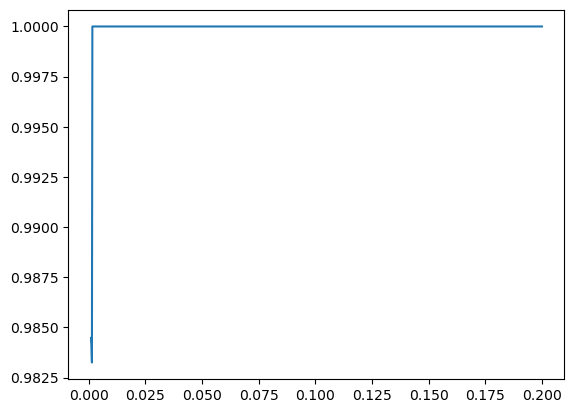

In [131]:
tau = np.linspace(0.001, 0.2, 1000)
perc = []

for t in tau:
    speed = 10
    angle = np.pi/4
    x, y, range_m, an_range_m = proj_midpoint(speed, angle, t)
    p = (range_m - an_range_m)/an_range_m
    perc.append(np.abs(p))

plt.plot(tau, perc)


In [25]:
(range_m - an_range_m)/an_range_m

-0.0298494962120566

## _Q1 (midpoint method):_
### What is the local truncation error in position for the midpoint method?



The local truncation error is $\mathcal{O} (h^3)$. The reason its this is because we compute the first derivative at 2 different points, i.e., we are using some form of the second derivative somewhere in our algorithm. 

## _Q2 (midpoint method):_
### What is the percentage error in the range, compared with the exact analytic value?

## <span style="color:red">Answer</span>

## _Q3 (midpoint method):_
### What is the scaling of the absolute percentage error $E$ with $\tau$?



## _Q4 (midpoint method):_
### Which of the following factors is the dominant source of error you (should have) observed above for the range, $R$?



## _Q5 (Euler method):_
### Determine the range for the Euler's method solution with the non-dimensional time step $\tau=0.01$.



## _Q6 (Euler method):_
### What is the percentage error in Euler's method?



## _Q7 (Euler method):_
### What is the dominant source of error in our estimate of the range using Euler's method as above?



## _Q8 (Euler method):_
### What dimensional time step (in seconds) does the non-dimensional time step $\tau=0.1$ correspond to?



## _Q9 (Euler method):_
### Produce a table with columns of the time step, the Euler's method estimate of the range, and the percentage error in the range by comparison with the analytic formula.



## _Q10 (Euler method):_
### When the value of $\tau$ is increased by a factor of ten, by what factor does the error change?



## _Q11 (Euler method):_
### Briefly outline the relevant argument for how the global error is predicted to scale with $\tau$; complete your answer with a brief statement about why the predicted scaling with $\tau$ is consistent with your results.

